In [91]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [92]:
df_train = pd.read_csv('problem_2_train.csv')
df_test = pd.read_csv('problem_2_test.csv')

In [93]:
df_train.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,AN,7,500004,233,233,131,A,ADLD,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5
1,2838330,AJ,10,226010,233,233,131,A,ADLD,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12
2,2835781,AJ,2,110018,233,233,228,A,ADLD,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9
3,2838589,AM,2,110018,233,233,228,B,ADLD,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9
4,2855214,AN,21,110015,233,233,131,A,ADLD,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8


In [94]:
df_test.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate
0,2829088,AN,3,560011,233,233,131,A,ADLD,560093,2017-07-30,2017-07-27,2018-02-01,4467,2018-02-06
1,2829866,AJ,2,110018,233,233,228,A,ADLD,110034,2017-07-17,2017-01-25,2018-02-01,4388,2018-02-08
2,2894489,AJ,3,560011,233,233,228,C,ADLD,590014,2018-01-12,2018-01-11,2018-02-21,4460,2018-02-28
3,2876708,AJ,2,110018,233,233,228,B,ADLD,250110,2017-08-07,2017-05-21,2018-02-16,4388,2018-02-26
4,2890283,AN,22,400104,233,233,131,C,ADLD,496001,2017-11-10,2017-09-22,2018-02-20,4581,2018-02-23


# Data Preprocessing

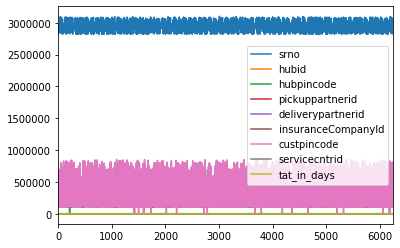

In [95]:
df_train.plot()
plt.show()

In [96]:
df_train.columns

Index(['srno', 'mobmake', 'hubid', 'hubpincode', 'pickuppartnerid',
       'deliverypartnerid', 'insuranceCompanyId', 'custpincodecategory',
       'claimtype', 'custpincode', 'memcreateddate', 'mobilepurchasedate',
       'claimintdate', 'servicecntrid', 'pickupStartdate', 'tat_in_days'],
      dtype='object')

In [97]:
# df.isnull().sum()

In [98]:
df_train.srno.value_counts()

2951287    4
2865502    4
2885668    3
3038517    3
2956372    2
2891966    2
3011894    2
3012946    2
3044892    2
2934881    2
2819467    2
3056440    2
2822557    2
2878000    2
3039486    2
2960986    2
3039983    2
2923461    2
2882355    2
3039212    2
3019136    2
3048248    2
3051276    2
3019781    2
2961709    2
2822700    2
3022198    2
3074237    2
3005015    2
3071319    2
          ..
2823520    1
3038561    1
2819426    1
3009891    1
2979172    1
2899301    1
2905420    1
2957692    1
3013961    1
3001671    1
3030317    1
2860334    1
2908697    1
3044515    1
3079473    1
2870579    1
2889012    1
2906118    1
3052856    1
2927931    1
2880828    1
2858301    1
2999614    1
2870591    1
2873437    1
3022145    1
3073710    1
2970112    1
2827590    1
2994662    1
Name: srno, Length: 6147, dtype: int64

In [99]:
pd.DataFrame(df_train.claimtype.value_counts())

,claimtype
ADLD,6246
EW,4


In [100]:
pd.DataFrame(df_train.custpincodecategory.value_counts())

,custpincodecategory
A,4020
B,1346
C,554
0,186
D,144


In [101]:
labels, uniques = pd.factorize(df_train.mobmake)
df_train['mobmake2'] = labels

In [102]:
labels, uniques = pd.factorize(df_train.custpincodecategory)
df_train['custpincodecategory2'] = labels

In [103]:
df_train.mobilepurchasedate = pd.to_datetime(df_train.mobilepurchasedate)
df_train.claimintdate = pd.to_datetime(df_train.claimintdate)
df_train.memcreateddate = pd.to_datetime(df_train.memcreateddate)
df_train.pickupStartdate = pd.to_datetime(df_train.pickupStartdate)

In [104]:
df_train['claimdelta'] = df_train.claimintdate - df_train.mobilepurchasedate
df_train['memcreatedelta'] = df_train.memcreateddate - df_train.mobilepurchasedate
df_train['pickupStartdelta'] = df_train.pickupStartdate - df_train.mobilepurchasedate

In [105]:
df_train.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,...,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days,mobmake2,custpincodecategory2,claimdelta,memcreatedelta,pickupStartdelta
0,2851218,AN,7,500004,233,233,131,A,ADLD,500001,...,2016-12-02,2018-02-08,4403,2018-02-13,5,0,0,433 days,146 days,438 days
1,2838330,AJ,10,226010,233,233,131,A,ADLD,226022,...,2017-03-05,2018-02-04,4444,2018-02-08,12,1,0,336 days,1 days,340 days
2,2835781,AJ,2,110018,233,233,228,A,ADLD,110018,...,2018-01-27,2018-02-03,4388,2018-02-12,9,1,0,7 days,5 days,16 days
3,2838589,AM,2,110018,233,233,228,B,ADLD,124001,...,2018-01-31,2018-02-04,4092,2018-02-14,9,2,1,4 days,-14 days,14 days
4,2855214,AN,21,110015,233,233,131,A,ADLD,201301,...,2018-01-20,2018-02-09,4580,2018-02-14,8,0,0,20 days,3 days,25 days


In [106]:
# def fun(x):
#     y = x.split()
#     return int(y[0])

In [107]:
# df_train.claimdelta = df_train.claimdelta.apply(fun)

In [108]:
# df_train.claimdelta = df_train.claimdelta.dt.days
# df_train.memcreatedelta = df_train.memcreatedelta.dt.days
# df_train.pickupStartdelta = df_train.pickupStartdelta.dt.days

In [109]:
df_train.shape

(6250, 21)

In [110]:
df_train[df_train.pickupStartdate > df_train.mobilepurchasedate].shape

(6156, 21)

In [111]:
df_train.loc[3,:]

srno                                2838589
mobmake                                  AM
hubid                                     2
hubpincode                           110018
pickuppartnerid                         233
deliverypartnerid                       233
insuranceCompanyId                      228
custpincodecategory                       B
claimtype                              ADLD
custpincode                          124001
memcreateddate          2018-01-17 00:00:00
mobilepurchasedate      2018-01-31 00:00:00
claimintdate            2018-02-04 00:00:00
servicecntrid                          4092
pickupStartdate         2018-02-14 00:00:00
tat_in_days                               9
mobmake2                                  2
custpincodecategory2                      1
claimdelta                  4 days 00:00:00
memcreatedelta           -14 days +00:00:00
pickupStartdelta           14 days 00:00:00
Name: 3, dtype: object

In [112]:
df_train.columns

Index(['srno', 'mobmake', 'hubid', 'hubpincode', 'pickuppartnerid',
       'deliverypartnerid', 'insuranceCompanyId', 'custpincodecategory',
       'claimtype', 'custpincode', 'memcreateddate', 'mobilepurchasedate',
       'claimintdate', 'servicecntrid', 'pickupStartdate', 'tat_in_days',
       'mobmake2', 'custpincodecategory2', 'claimdelta', 'memcreatedelta',
       'pickupStartdelta'],
      dtype='object')

In [113]:
X = df_train[['srno', 'hubid', 'hubpincode', 'pickuppartnerid',
       'deliverypartnerid', 'insuranceCompanyId', 'custpincodecategory2', 'custpincode', 'servicecntrid','mobmake2']]

In [153]:
y = df_train['tat_in_days']

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)

In [156]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [157]:
y_pred = linreg.predict(X_test)

In [159]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

4.625699575227192


In [120]:
df_train.columns

Index(['srno', 'mobmake', 'hubid', 'hubpincode', 'pickuppartnerid',
       'deliverypartnerid', 'insuranceCompanyId', 'custpincodecategory',
       'claimtype', 'custpincode', 'memcreateddate', 'mobilepurchasedate',
       'claimintdate', 'servicecntrid', 'pickupStartdate', 'tat_in_days',
       'mobmake2', 'custpincodecategory2', 'claimdelta', 'memcreatedelta',
       'pickupStartdelta'],
      dtype='object')

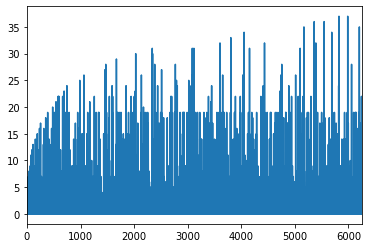

In [121]:
df_train['mobmake2'].plot()

In [122]:
pd.get_dummies(df_train['mobmake'], prefix = 'mobmake').head()

,mobmake_A,mobmake_AA,mobmake_AB,mobmake_AD,mobmake_AE,mobmake_AF,mobmake_AG,mobmake_AI,mobmake_AJ,mobmake_AK,...,mobmake_O,mobmake_P,mobmake_R,mobmake_S,mobmake_T,mobmake_U,mobmake_V,mobmake_W,mobmake_Y,mobmake_Z
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['mobmake'], prefix = 'mobmake')], axis=1)

In [149]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['custpincodecategory'], prefix = 'custpincodecategory')], axis=1)

In [152]:
df_train.columns

Index(['srno', 'mobmake', 'hubid', 'hubpincode', 'pickuppartnerid',
       'deliverypartnerid', 'insuranceCompanyId', 'custpincodecategory',
       'claimtype', 'custpincode', 'memcreateddate', 'mobilepurchasedate',
       'claimintdate', 'servicecntrid', 'pickupStartdate', 'tat_in_days',
       'mobmake2', 'custpincodecategory2', 'claimdelta', 'memcreatedelta',
       'pickupStartdelta', 'mobmake_A', 'mobmake_AA', 'mobmake_AB',
       'mobmake_AD', 'mobmake_AE', 'mobmake_AF', 'mobmake_AG', 'mobmake_AI',
       'mobmake_AJ', 'mobmake_AK', 'mobmake_AL', 'mobmake_AM', 'mobmake_AN',
       'mobmake_AO', 'mobmake_AP', 'mobmake_AR', 'mobmake_B', 'mobmake_C',
       'mobmake_D', 'mobmake_F', 'mobmake_G', 'mobmake_H', 'mobmake_I',
       'mobmake_J', 'mobmake_K', 'mobmake_L', 'mobmake_M', 'mobmake_N',
       'mobmake_O', 'mobmake_P', 'mobmake_R', 'mobmake_S', 'mobmake_T',
       'mobmake_U', 'mobmake_V', 'mobmake_W', 'mobmake_Y', 'mobmake_Z',
       'custpincodecategory_0', 'custpincodecatego

In [151]:
X = df_train[['srno', 'hubid', 'hubpincode', 'pickuppartnerid',
       'deliverypartnerid', 'insuranceCompanyId', 'custpincode', 'servicecntrid', 'mobmake_A', 'mobmake_AA', 'mobmake_AB',
       'mobmake_AD', 'mobmake_AE', 'mobmake_AF', 'mobmake_AG', 'mobmake_AI',
       'mobmake_AJ', 'mobmake_AK', 'mobmake_AL', 'mobmake_AM', 'mobmake_AN',
       'mobmake_AO', 'mobmake_AP', 'mobmake_AR', 'mobmake_B', 'mobmake_C',
       'mobmake_D', 'mobmake_F', 'mobmake_G', 'mobmake_H', 'mobmake_I',
       'mobmake_J', 'mobmake_K', 'mobmake_L', 'mobmake_M', 'mobmake_N',
       'mobmake_O', 'mobmake_P', 'mobmake_R', 'mobmake_S', 'mobmake_T',
       'mobmake_U', 'mobmake_V', 'mobmake_W', 'mobmake_Y', 'mobmake_Z', 'custpincodecategory_0', 'custpincodecategory_A',
       'custpincodecategory_B', 'custpincodecategory_C',
       'custpincodecategory_D']]